In [17]:
# import libraries
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import keras
from keras.preprocessing.sequence import TimeseriesGenerator

import warnings
warnings.filterwarnings("ignore")

import plotly.graph_objects as go

np.random.seed(1)
tf.random.set_seed(1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed, Bidirectional

[Predicting Sequential Data using LSTM: An Introduction](https://towardsdatascience.com/time-series-forecasting-with-recurrent-neural-networks-74674e289816)

In [18]:
huwaei=pd.read_csv('training_100.csv')
huwaei['timestamp']=pd.to_datetime(huwaei['timestamp'])
huwaei.head() 
huwaei.tail()

timestamp  kpi_value  request_count  anomaly_label
20154 2020-08-28 01:56:00+02:00   0.998149          26467              0
20155 2020-08-28 01:57:00+02:00   0.998340          26502              0
20156 2020-08-28 01:58:00+02:00   0.998364          26887              0
20157 2020-08-28 01:59:00+02:00   0.998428          26712              0
20158 2020-08-28 02:00:00+02:00   0.997407          29694              0

In [19]:
kpi=huwaei['kpi_value']
timestamp=huwaei['timestamp']
label=huwaei['anomaly_label']

Text(0.5, 1.0, 'Huwaei Dataset')

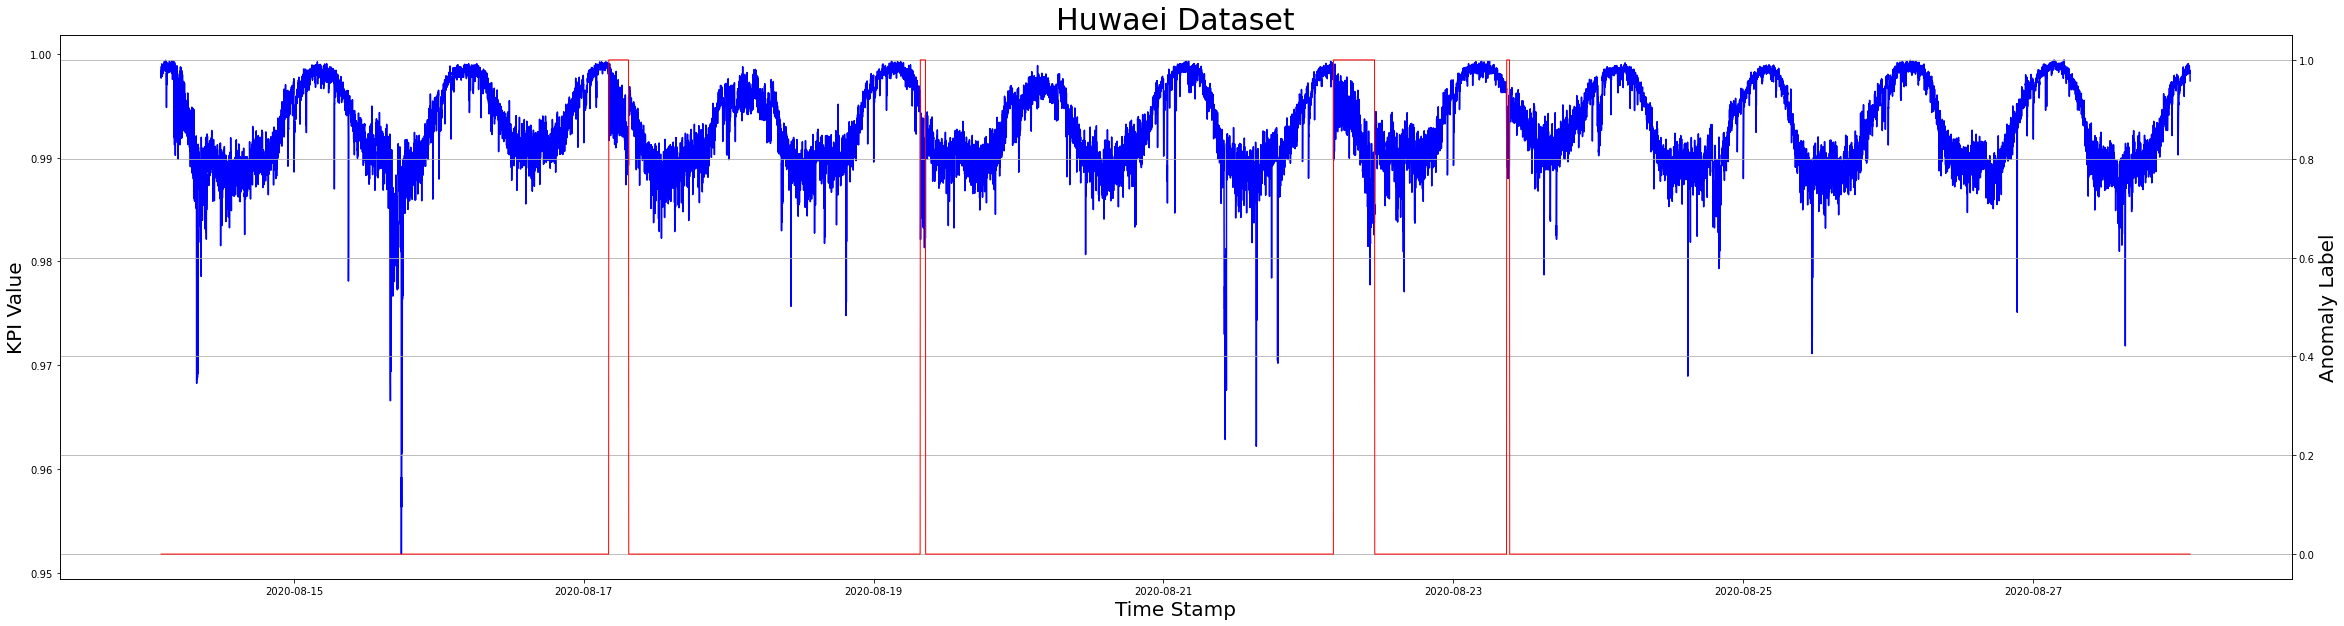

In [20]:
fig, ax2d = plt.subplots(figsize=(40,10))
ax2a = ax2d.twinx()
ax2d.plot(timestamp, kpi, color='blue')
ax2a.plot(timestamp, label, color='red', linewidth='1')
ax2d.set_xlabel('Time Stamp', fontsize=20)
ax2d.set_ylabel('KPI Value', fontsize=20)
ax2a.set_ylabel('Anomaly Label', fontsize=20)

plt.grid()

plt.title('Huwaei Dataset', fontsize=30)

In [21]:
print(f"Length of full data: {len(huwaei)}")

Length of full data: 20159


In [22]:
x=huwaei[0:50]
y=huwaei[100:150]

x=pd.DataFrame(x)
y=pd.DataFrame(y)

frames=[x,y]
results=pd.concat(frames)
results

timestamp  kpi_value  request_count  anomaly_label
0   2020-08-14 02:00:00+02:00   0.998755          24908              0
1   2020-08-14 02:01:00+02:00   0.997683          25029              0
2   2020-08-14 02:02:00+02:00   0.998341          24115              0
3   2020-08-14 02:03:00+02:00   0.998211          24031              0
4   2020-08-14 02:04:00+02:00   0.998403          23790              0
..                        ...        ...            ...            ...
145 2020-08-14 04:25:00+02:00   0.997948          20954              0
146 2020-08-14 04:26:00+02:00   0.991813          21132              0
147 2020-08-14 04:27:00+02:00   0.998292          21080              0
148 2020-08-14 04:28:00+02:00   0.998045          20967              0
149 2020-08-14 04:29:00+02:00   0.997559          21709              0

[100 rows x 4 columns]

In [23]:
arr=np.where(label==1)
arr

(array([ 4448,  4449,  4450,  4451,  4452,  4453,  4454,  4455,  4456,
         4457,  4458,  4459,  4460,  4461,  4462,  4463,  4464,  4465,
         4466,  4467,  4468,  4469,  4470,  4471,  4472,  4473,  4474,
         4475,  4476,  4477,  4478,  4479,  4480,  4481,  4482,  4483,
         4484,  4485,  4486,  4487,  4488,  4489,  4490,  4491,  4492,
         4493,  4494,  4495,  4496,  4497,  4498,  4499,  4500,  4501,
         4502,  4503,  4504,  4505,  4506,  4507,  4508,  4509,  4510,
         4511,  4512,  4513,  4514,  4515,  4516,  4517,  4518,  4519,
         4520,  4521,  4522,  4523,  4524,  4525,  4526,  4527,  4528,
         4529,  4530,  4531,  4532,  4533,  4534,  4535,  4536,  4537,
         4538,  4539,  4540,  4541,  4542,  4543,  4544,  4545,  4546,
         4547,  4548,  4549,  4550,  4551,  4552,  4553,  4554,  4555,
         4556,  4557,  4558,  4559,  4560,  4561,  4562,  4563,  4564,
         4565,  4566,  4567,  4568,  4569,  4570,  4571,  4572,  4573,
      

In [24]:
train1=huwaei[0:4401]
test1=huwaei[4402:5001]
train2=huwaei[5002:7001]
test2=huwaei[7002:8001]
train3=huwaei[8002:11601]
test3=huwaei[11602:14501]
train4=huwaei[14501:20158]

Text(0.5, 1.0, 'Huwaei Dataset')

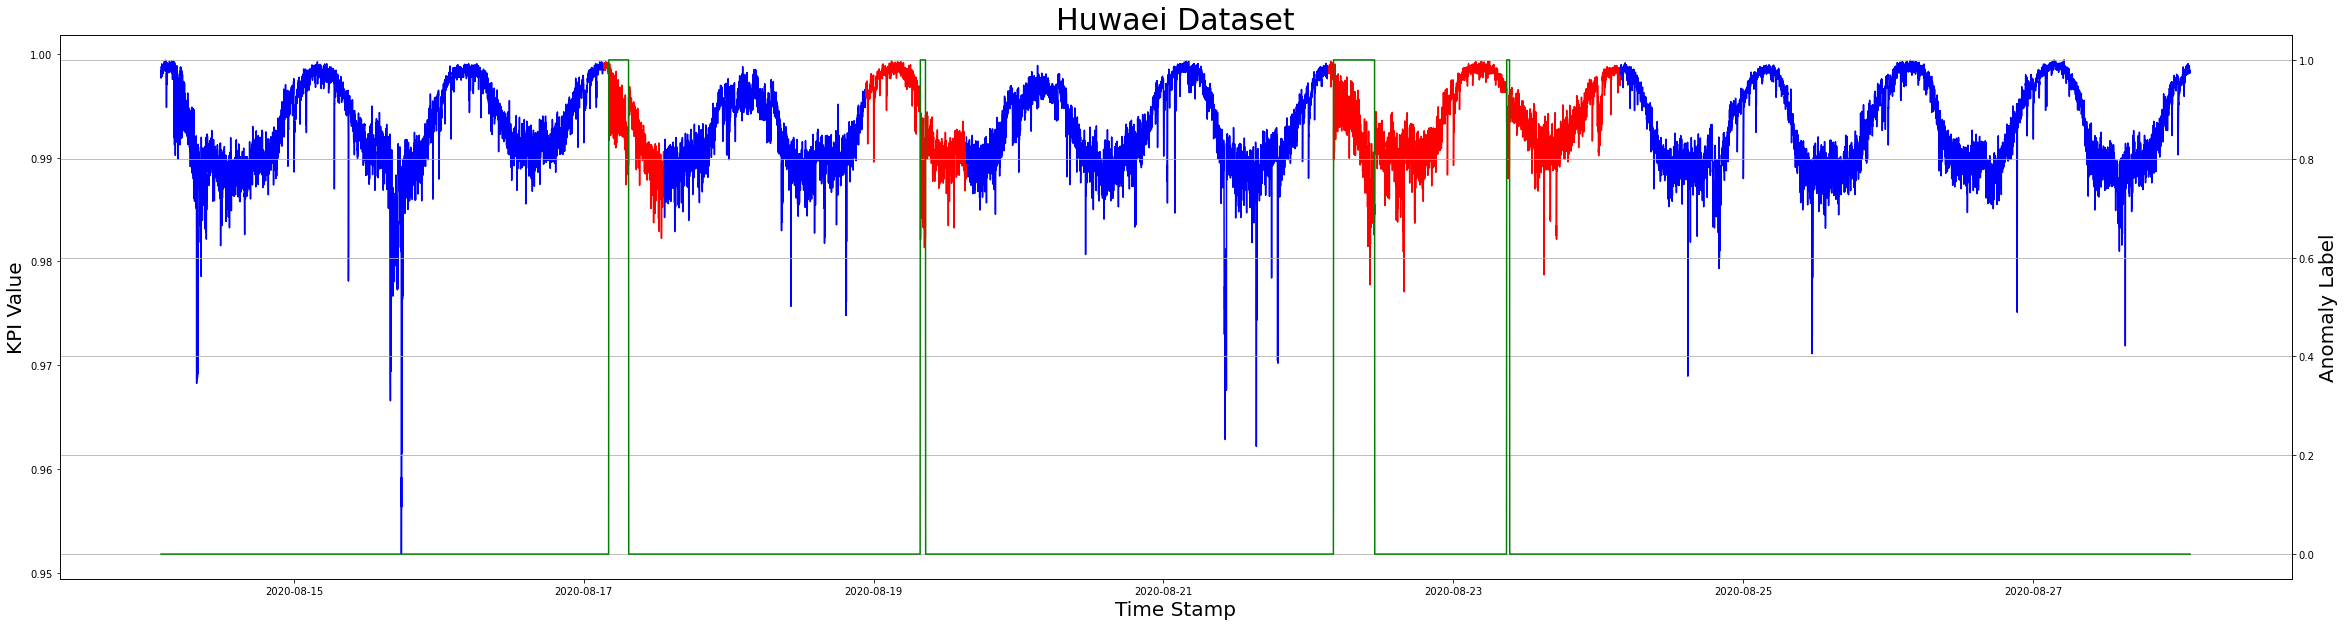

In [25]:
fig, ax2d = plt.subplots(figsize=(40,10))
ax2a = ax2d.twinx()
ax2d.plot(train1['timestamp'], train1['kpi_value'], color='blue')
ax2d.plot(test1['timestamp'], test1['kpi_value'], color='red')
ax2d.plot(train2['timestamp'], train2['kpi_value'], color='blue')
ax2d.plot(test2['timestamp'], test2['kpi_value'], color='red')
ax2d.plot(train3['timestamp'], train3['kpi_value'], color='blue')
ax2d.plot(test3['timestamp'], test3['kpi_value'], color='red')
ax2d.plot(train4['timestamp'], train4['kpi_value'], color='blue')
ax2a.plot(timestamp, label, color='green', linewidth='1.5')
ax2d.set_xlabel('Time Stamp', fontsize=20)
ax2d.set_ylabel('KPI Value', fontsize=20)
ax2a.set_ylabel('Anomaly Label', fontsize=20)

plt.grid()

plt.title('Huwaei Dataset', fontsize=30)

In [26]:
train1=pd.DataFrame(train1)
train2=pd.DataFrame(train2)
train3=pd.DataFrame(train3)
train4=pd.DataFrame(train4)

total_train=[train1, train2, train3, train4]
total_train=pd.concat(total_train)

test1=pd.DataFrame(test1)
test2=pd.DataFrame(test2)
test3=pd.DataFrame(test3)

total_test=[test1, test2, test3]
total_test=pd.concat(total_test)

print(f"Total Training Samples: {len(total_train)}")
print(f"Total Testing Samples: {len(total_test)}")
print(f"Training Percentage: {round((100*len(total_train))/(len(total_train)+len(total_test)),2)} %")

Total Training Samples: 15656
Total Testing Samples: 4497
Training Percentage: 77.69 %


In [29]:
train=total_train['kpi_value']
train=np.array(train)
train

array([0.99875542, 0.99768269, 0.99834128, ..., 0.99833975, 0.99836352,
       0.99842767])

In [30]:
test=total_test['kpi_value']
test=np.array(test)
test

array([0.99895411, 0.99864392, 0.99916925, ..., 0.99872721, 0.99856569,
       0.99832311])

In [151]:
# train1=pd.DataFrame(train1)
# total_train=train1


# test1=pd.DataFrame(test1)
# total_test=test1

# print(f"Total Training Samples: {len(total_train)}")
# print(f"Total Testing Samples: {len(total_test)}")
# print(f"Training Percentage: {round((100*len(total_train))/(len(total_train)+len(total_test)),2)} %")

In [139]:
# close_data = kpi.values
# close_data = close_data.reshape((-1,1))

# split_percent= 80
# split_percent = split_percent/100
# split = int(split_percent*len(close_data))

# close_train = close_data[:split]
# close_test = close_data[split:]

# date_train = timestamp[:split]
# date_test = timestamp[split:]

# print(f"Number of training samples: {len(close_train)}")
# print(f"Number of predicting samples: {len(close_test)}")

The "[TimeseriesGenerator](https://keras.io/api/preprocessing/timeseries/)" function accepts a sequence of data points collected at equal intervals, as well as time-series characteristics such as sequence/window length, spacing between two sequences/windows, and so on, to generate batches of time-series inputs and targets.

In [140]:
# look_back = 30 # We could change to 60

# train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=20) #change the batch size     
# test_generator = TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=1)

In [31]:
look_back = 32 # We could change to 60

train_generator = TimeseriesGenerator(train, train, length=look_back, batch_size=20) #change the batch size     
test_generator = TimeseriesGenerator(test, test, length=look_back, batch_size=1)

In [32]:
train_generator[0][1]

array([0.99850734, 0.9990173 , 0.99900493, 0.99928742, 0.99860323,
       0.99905054, 0.99840997, 0.9988464 , 0.99914959, 0.99851064,
       0.99890641, 0.99864032, 0.99903625, 0.99836128, 0.99882879,
       0.99898469, 0.99939922, 0.99867004, 0.99861382, 0.99859557])

In [33]:
test_generator[0][1]

array([0.99917306])

In [34]:
print(train_generator[0][1].shape)
print(test_generator[0][1].shape)

(20,)
(1,)


# Creating the Neural Network

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
782/782 [==============================] - 7s 8ms/step - loss: 0.0134
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 5.6948e-06
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 6.9556e-06
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 1.0368e-05
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 1.0963e-05
Epoch 6/10
782/782 [=====

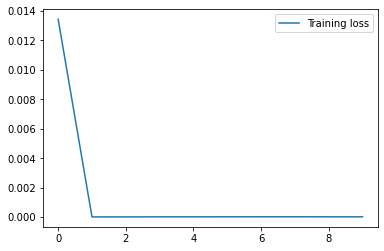

In [36]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(look_back,1)))
model.add(Dense(1))
opt = tf.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')
model.summary()

num_epochs = 10
history=model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.legend()

In [ ]:
# date_pred = date_test[look_back:]
# prediction = model.predict_generator(test_generator)

# close_train = close_train.reshape((-1))
# close_test = close_test.reshape((-1))
# prediction = prediction.reshape((-1))

# trace1 = go.Scatter(
#     x = date_train,
#     y = close_train,
#     mode = 'lines',
#     name = 'Data'
# )

# trace2 = go.Scatter(
#     x = date_test,
#     y = close_test,
#     #mode='lines',
#     name = 'Ground Truth',
#     line=dict(color='cyan', width=2)
# )

# trace3 = go.Scatter(
#     x = date_pred,
#     y = prediction,
#     #mode = 'lines',
#     name = 'Prediction',
#     line=dict(color='red')
# )
# layout = go.Layout(
#     title = "Huwaei Prediction",
#     xaxis = {'title' : "Timestamp"},
#     yaxis = {'title' : "KPI Value"}
# )

# fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
# fig.show()

In [37]:
prediction = model.predict_generator(test_generator)

In [38]:
train = train.reshape((-1))
test = test.reshape((-1))
prediction = prediction.reshape((-1))

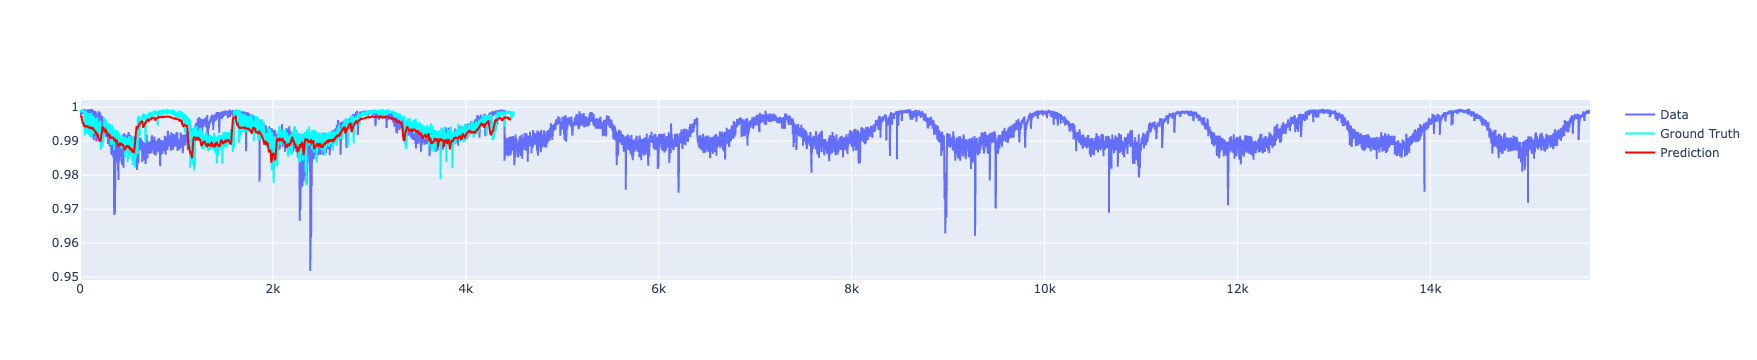

In [39]:
trace1 = go.Scatter(
     y = train,
     mode = 'lines',
     name = 'Data'
 )

trace2 = go.Scatter(
     y = test,
     mode = 'lines',
     name = 'Ground Truth',
     line=dict(color='cyan', width=2)
 )

trace3 = go.Scatter(
     y = prediction,
     mode = 'lines',
     name = 'Prediction',
     line=dict(color='red', width=2)
 )

fig = go.Figure(data=[trace1, trace2, trace3])
fig.show()

In [44]:
print(f"Prediction Shape: {prediction.shape}")
print(f"Ground Thruth Shape: {test.shape}")

Prediction Shape: (4467,)
Ground Thruth Shape: (4497,)


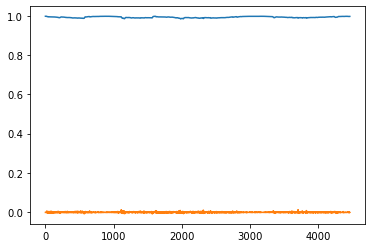

In [47]:
plt.plot(prediction)
plt.plot(prediction-test[30:])

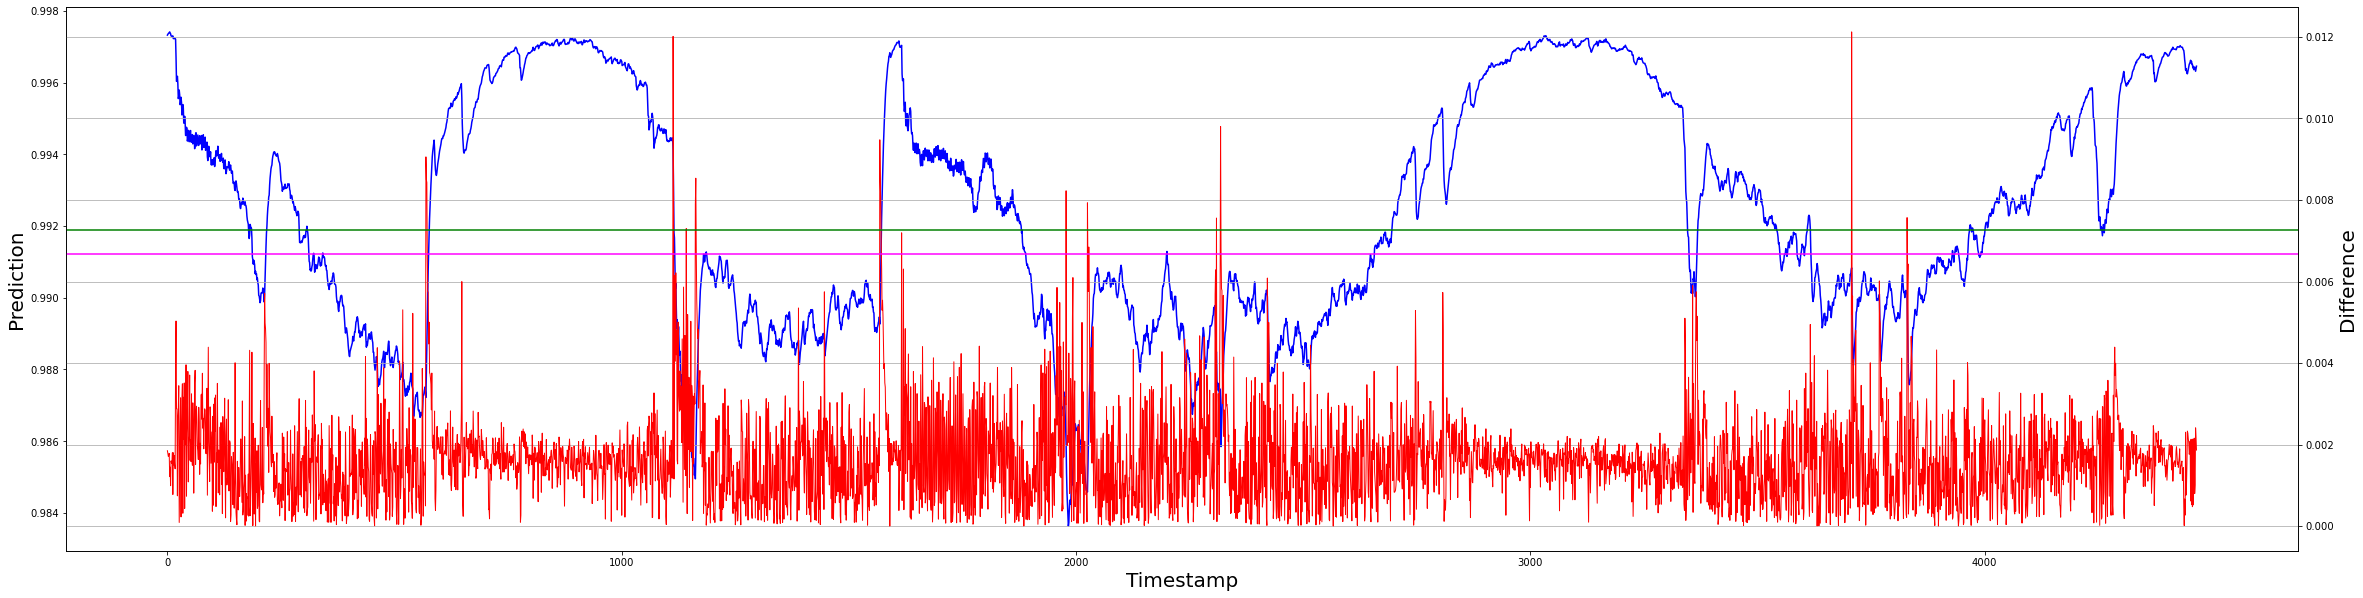

In [63]:
difference=np.abs(prediction-test[30:])
max_difference=difference.max()
max60=0.6*max_difference
sigma6=6*difference.std()

fig, ax2d = plt.subplots(figsize=(40,10))
ax2a = ax2d.twinx()
ax2d.plot(prediction, color='blue')
ax2a.plot(difference, color='red', linewidth='1')

ax2a.axhline(max60, color='green')
ax2a.axhline(sigma6, color='magenta')

ax2d.set_xlabel('Timestamp', fontsize=20)
ax2d.set_ylabel('Prediction', fontsize=20)
ax2a.set_ylabel('Difference', fontsize=20)

plt.grid()

1. **"close_train"** is the data set used for the training using a certain percentage to split the dataset
2. **"prediction"** speaks for itself, it is basicaly predicting what will happen on the testing data
3. **"close_test"** is the data set used for the testing using the remaining percentage to compare with the prediction, also known as the "Ground Truth"

# Forecasting

In [114]:
kpi=huwaei['kpi_value']
kpi=np.array(kpi)
kpi = kpi.reshape((-1))

In [115]:
kpi.shape

(20159,)

In [116]:
def predict(num_prediction, model):
    prediction_list = train[-(look_back):]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list

In [119]:
# def predict_dates(num_prediction):
#     prediction_dates = timestamp[len(close_train)+1:len(close_train)+num_prediction+1] 
#     return prediction_dates
    
# def predict_dates(num_prediction):
#     last_date = df['Time'].values[-1]
#     prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
#     return prediction_dates

In [117]:
num_prediction = len(test)-1
print(f"Number for predictions: {num_prediction}")

Number for predictions: 4496


In [118]:
print("Forecast")
forecast = predict(num_prediction, model)
forecast

Forecast


array([0.99842767, 0.99239421, 0.99073994, ..., 0.98253131, 0.98253131,
       0.98253131])

In [120]:
# print("Forecast Dates")
# forecast_dates = predict_dates(num_prediction)
# print(forecast_dates)

In [121]:
# def predict_dates(num_prediction):
#     prediction_dates = df['Time'][len(close_train)+1:len(close_train)+num_prediction+1] 
#     return prediction_dates

# predict_dates(5)

In [122]:
# df['Time'].values[-400]

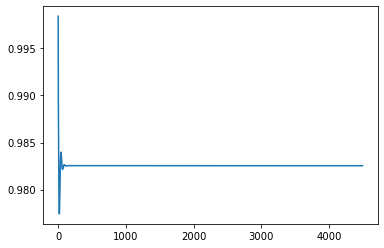

In [123]:
plt.plot(forecast)

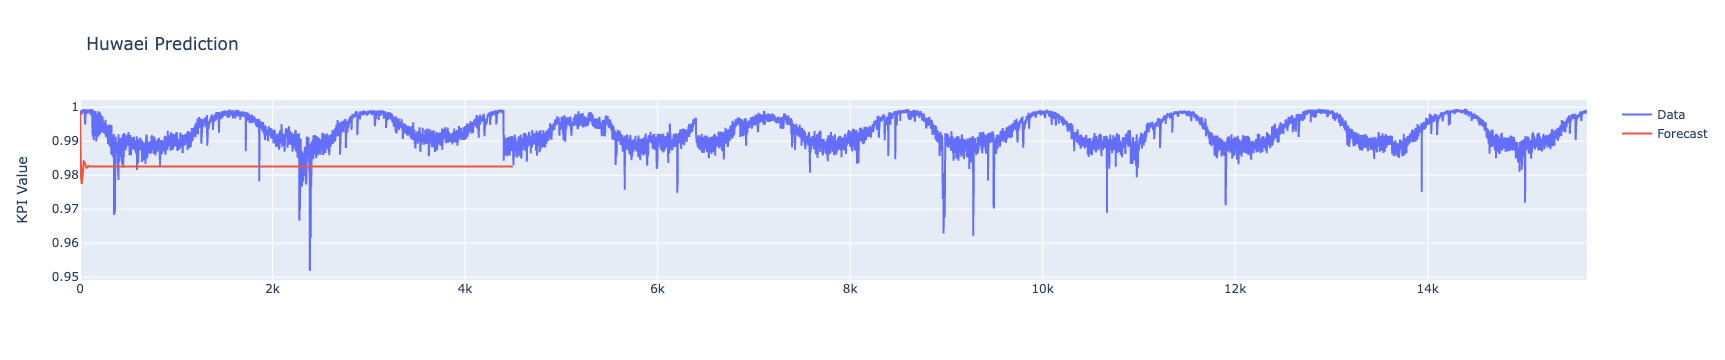

In [124]:
trace1 = go.Scatter(
    y = train,
    mode = 'lines',
    name = 'Data'
)

trace3 = go.Scatter(
    y = forecast,
    mode = 'lines',
    name = 'Forecast'
)

layout = go.Layout(
    title = "Huwaei Prediction",
    yaxis = {'title' : "KPI Value"}
)
fig = go.Figure(data=[trace1, trace3], layout=layout)
fig.show()

This prediction behavior is normal because of the propogation from the small error in the begining to propogate into a larger error during the forecast phase